# <span style=color:blue>**Part 1:** Introduction</span>

### <span style=color:green>Revisions: </span>

#### After the first attempt, it was made obvious that the reason I could not achieve accurate results was through my datasets. I needed a way to combine both my raw and summary datasets. This was because my raw data had a large sample size and individual data points needed to perform time analysis, while the summary dataset had all the other information like pitch, tactility, and price that would help me make models and perform deeper analysis.

### <span style=color:green>Goals: </span>

### **Changing the questions of interest:**
#### 1) What do the following summary statistics of each predictor tell us?
#### 2) What does the distribution of each switch look like?
#### 3) Is there a correlation between weight and WPM?
#### 4) Is there a correlation between price and WPM?
#### 5) Construct a 95% confidence interval for average WPM.
#### 6) Construct a 95% confidence interval for adjusted mean WPM.
#### 7) Is there a relationship between dates and average WPM/accuracy? 
#### 8) Can we predict the WPM of a switch based on its ID?
#### 9) Can we predict the WPM of a switch based on loudness, enjoyment, weight, sound, and tactility?
#### 10) Given all the predictors, can we predict the WPM of a test?
    

# <span style=color:blue>**Part 2:** Load Dataset </span>

### <span style=color:green>Importing Packages </span>

In [56]:
#General Packages:
import pandas as pd
import matplotlib as mat
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np
import math
import scipy.stats as stats

#Predicitve Modeling:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#VIF:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Spearman:
from scipy.stats import spearmanr

#Random Forest:
from sklearn.ensemble import RandomForestRegressor

#KNN:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier


### <span style=color:green>Loading the Dataset </span>

In [57]:
kb_df = pd.read_csv("C:/Users/alexd/Downloads/Projects/Keyboard Self Study/Part 2/Code/Python/Attempt 2/final_keyboard_dataset.csv")

In [58]:
kb_df.head()

,ID,WPM,Accuracy,Price,Adj. Mean WPM,Loudness,Tactility,Weight,Date,Date Average,Date Accuracy
0,5,66,0.87,0.65,0.0,62.7,No,65,6/13/2025,76.9,0.89
1,5,69,0.87,0.65,0.0,62.7,No,65,6/13/2025,76.9,0.89
2,5,74,0.90,0.65,0.0,62.7,No,65,6/13/2025,76.9,0.89
3,5,84,0.92,0.65,0.0,62.7,No,65,6/13/2025,76.9,0.89
4,5,70,0.86,0.65,0.0,62.7,No,65,6/13/2025,76.9,0.89


# <span style=color:blue>**Part 3:** Data Cleaning/Reorganization: </span>

### <span style=color:green>Slight Modifications done to our dataset: </span>

#### **Making a days_since_start for time analysis:**

In [59]:
#Converting to Datetime:
kb_df['Date'] = pd.to_datetime(kb_df['Date'])

# Create a new column: days_since_start:
kb_df['days_since_start'] = (kb_df['Date'] - kb_df['Date'].min()).dt.days

#### **Recategorizing our tactility column:**

In [60]:
#Collpasing our Tactility column and refactoring it: 
kb_df["Tactility"] = kb_df["Tactility"].apply(lambda x: "No" if x == 'No' else "Tactile")
kb_df = pd.get_dummies(kb_df, columns=["Tactility"], drop_first=True)

#Changing the datatype to numeric: 
kb_df["Tactility_Tactile"] = kb_df["Tactility_Tactile"].astype(int)

#Renaming Album Name to Album:
kb_df = kb_df.rename(columns ={'Tactility_Tactile': 'Tactility'})

In [61]:
kb_df.head()

,ID,WPM,Accuracy,Price,Adj. Mean WPM,Loudness,Weight,Date,Date Average,Date Accuracy,days_since_start,Tactility
0,5,66,0.87,0.65,0.0,62.7,65,2025-06-13,76.9,0.89,0,0
1,5,69,0.87,0.65,0.0,62.7,65,2025-06-13,76.9,0.89,0,0
2,5,74,0.90,0.65,0.0,62.7,65,2025-06-13,76.9,0.89,0,0
3,5,84,0.92,0.65,0.0,62.7,65,2025-06-13,76.9,0.89,0,0
4,5,70,0.86,0.65,0.0,62.7,65,2025-06-13,76.9,0.89,0,0


### <span style=color:red>Legend: </span>
#### **Tactility = 0:** No Tactility
#### **Tactility = 1:** Tactile

# <span style=color:blue> **Part 4:** Exploratory Data Analysis </span>

## <span style=color:blue> **Question 1:** What do the following summary statistics of each predictor tell us? </span>

In [62]:
#Looking at the summary statistics and spread of certain predictors:
kb_df.describe()

,ID,WPM,Accuracy,Price,Adj. Mean WPM,Loudness,Weight,Date,Date Average,Date Accuracy,days_since_start,Tactility
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950,950.000000,950.000000,950.000000,950.000000
mean,6.684211,81.541053,0.913242,0.558947,0.473684,67.984211,62.421053,2025-06-21 05:03:09.473684224,81.561053,0.915263,8.210526,0.315789
min,1.000000,42.000000,0.720000,0.200000,-6.300000,62.600000,50.000000,2025-06-13 00:00:00,76.900000,0.890000,0.000000,0.000000
25%,4.000000,76.000000,0.890000,0.350000,-0.500000,62.700000,60.000000,2025-06-17 00:00:00,79.200000,0.910000,4.000000,0.000000
50%,6.000000,82.000000,0.920000,0.650000,0.000000,69.300000,65.000000,2025-06-22 00:00:00,82.000000,0.920000,9.000000,0.000000
75%,10.000000,88.000000,0.940000,0.700000,2.700000,70.900000,67.000000,2025-06-26 00:00:00,84.300000,0.930000,13.000000,1.000000
max,13.000000,102.000000,0.990000,1.200000,4.200000,76.600000,68.000000,2025-06-29 00:00:00,86.500000,0.930000,16.000000,1.000000
std,3.730271,8.149544,0.035539,0.231021,2.852142,4.531038,5.521448,NaN,3.134037,0.012559,4.982360,0.465074


Text(0.5, 0, '')

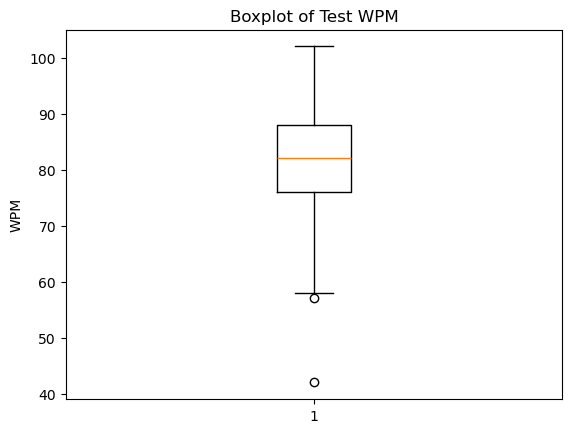

In [63]:
plt.boxplot(kb_df['WPM'])
plt.title('Boxplot of Test WPM')
plt.ylabel('WPM')
plt.xlabel('')

Text(0, 0.5, 'Accuracy')

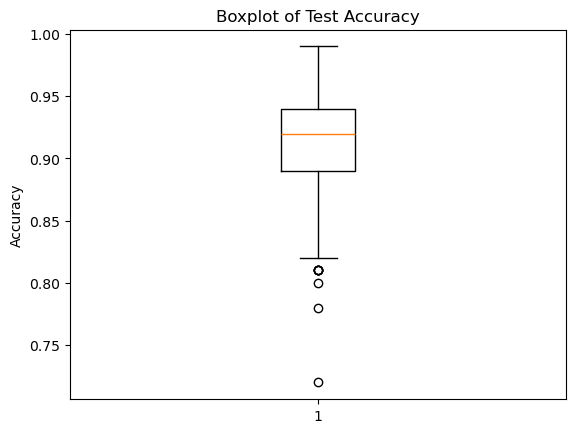

In [64]:
plt.boxplot(kb_df['Accuracy'])
plt.title('Boxplot of Test Accuracy')
plt.ylabel('Accuracy')

#### **WPM:** If I took the average of all my typing tests, I would type at an average of 81.5 WPM. This is fairly accurate to what my overall WPM is in Monkeytype (81 WPM). The distribution also seems to be normal, outside of 2 outliers.
#### **Accuracy**: If I took the average of all my typing tests, I would have a typing accuracy of 91.3%. Like WPM, we are normally distributed, outside of the 4 outliers present. There are likely more outliers for accuracy than WPM because we had a tighter spread for accuracy than WPM, meaning there is less variability. 
#### **Loudness:** Of the 13 switches we tested, the average loudness (measured in dB) was about 68 DB. All things considered, this is fairly loud. However, this is likely due to the method I record the sound of the switches. We also have a skewed left distribution, telling me that we have switches that hover around 68+ more than <68.
#### **Price**: The average cost of one switch in the experiment is about 56 cents, which is fairly expensive in today's market. However, this is likely due to the majority of our switches being "older".
#### **Weight:** The average weight of all of the switches I tried was about 62.4 grams. I believe this is about average to above-average weight for switches today.
#### **Date Average:** When taking the average of all 16 testing days, my mean Daily WPM is 81.6. This is very close to our Average WPM. 
#### **Date Accuracy:** My mean Daily accuracy is 91.5%, which is slightly higher than my Average Accuracy. 

## <span style=color:blue> **Question 2:** What do the following summary statistics of each predictor tell us? </span>

#### Summary Statistics Switch Analysis was done on SQL.

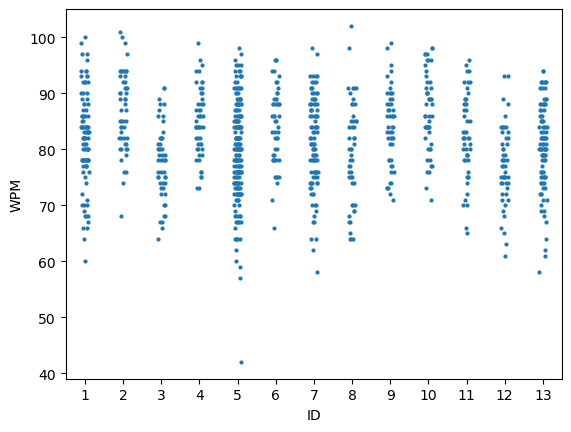

In [65]:
sns.stripplot(x='ID', y='WPM', data=kb_df, jitter=True, size=3)
plt.show()

#### **Observations:**
#### 1) Most of our tests were between mid-70s to low-90s. 
#### 2) We see some outliers from the Tealios V2 (ID 8), and the Oil King, which has a very obvious outlier around ~40. The Tealios is an interesting case, as all of the other typing tests hovered around 65-90.
#### 3) The Oil king seems to have the widest variance among all of the switches, showing a large range of values ranging from ~40s to ~100.
    
    

# <span style=color:blue>**Part 5:** Data Analysis </span>

## <span style=color:blue> **Question 3:** What does the distribution of each switch look like? </span>

### <span style=color:green> Checking conditions for Pearson's Coefficient </span>

#### **1. Linearity**

Text(0.5, 1.0, 'Residual Plot')

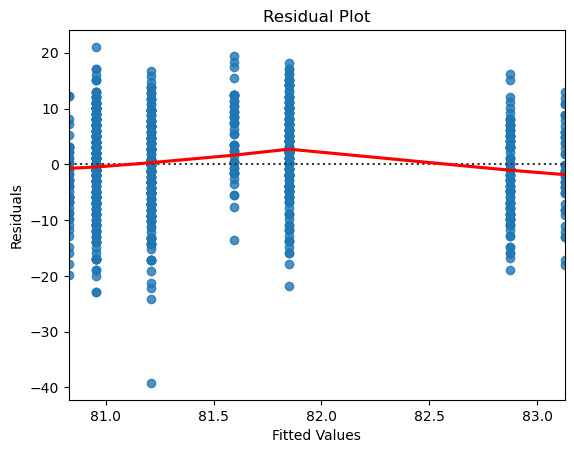

In [66]:
#Making a Scatterplot: 
x = kb_df['Weight']
y = kb_df['WPM']
con_x = sm.add_constant(x) 
Weight_model = sm.OLS(y, con_x).fit() 
predictions = Weight_model.predict(con_x)
residuals = y - predictions

sns.residplot(x=predictions, y=residuals, lowess=True, line_kws={"color": "red"})
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

#### While our data does deviate slightly from the linear pattern, we should still be able to run Pearson's coefficient reliably.

#### **2. Independence**

#### Through the way the experiment was designed, I ensured that one typing test would not influence the other. The weight of one switch did not affect the typing performance of another of a different weight. 

#### **3. Normality**

Text(0.5, 0, 'Weight')

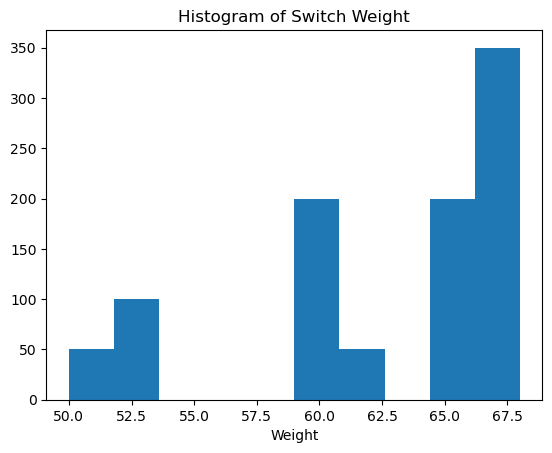

In [67]:
plt.hist(kb_df['Weight'])
plt.title('Histogram of Switch Weight')
plt.xlabel('Weight')

### **It seems that our price predictor is not normally distributed, showing discrete clusters. Because of this, we will run Spearman's coefficient, since it's better when working with ordinal/discrete data.**

### <span style=color:red>Spearman's rank correlation: </span>

#### **Idea:** Does not assume linearity, and instead checks monotonic relationships.
#### **Aim:** Use it to examine if x increases/decreases in y, despite not being linear.

### <span style=color:green> Running Spearman's Coefficient </span>

In [68]:
rho, p = spearmanr(x, y)
print(f"rho ={rho}")
print(f"p ={p}")

rho =-0.12002350544758929
p =0.00020897377317303676


#### **Observations:**
#### 1) There is a very weak negative monotonic relationship between Weight and WPM($\rho$ = -0.12).
#### 2) Our small p-value (close to 0) indicates that there is a statistically significant monotonic relationship between Weight and WPM.

## <span style=color:blue> **Question 4:** Is there a correlation between Price and WPM? </span>

#### **1. Linearity**

Text(0.5, 1.0, 'Residual Plot')

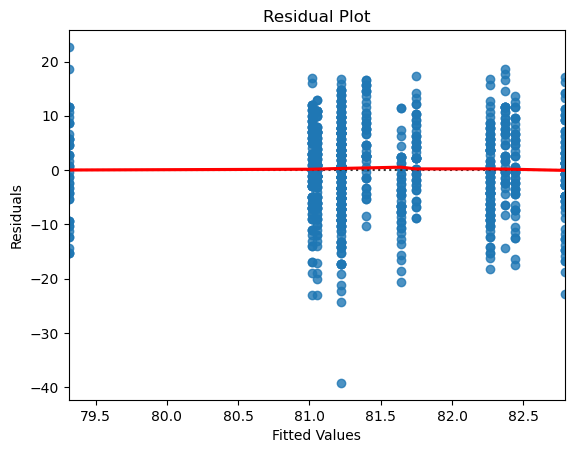

In [69]:
x = kb_df['Price']
y = kb_df['WPM']

con_x = sm.add_constant(x) 
Price_model = sm.OLS(y, con_x).fit() 
predictions = Price_model.predict(con_x)
residuals = y - predictions

sns.residplot(x=predictions, y=residuals, lowess=True, line_kws={"color": "red"})
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

#### Our data looks to be almost perfectly linear. We pass the linear clause.

#### **2. Independence**

#### We pass independence for the same reasons as the last. Knowing the price of one switch does not influence or change the results of another test. 

#### **3. Normality**

Text(0.5, 0, 'Prices')

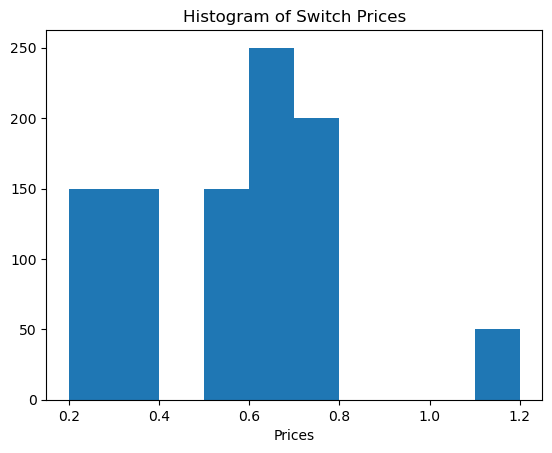

In [70]:
plt.hist(kb_df['Price'])
plt.title('Histogram of Switch Prices')
plt.xlabel('Prices')

### **We have seem to run into the same problem here, as our data doesn't seem to be normal whatsoever. Again, we will run Spearman's coefficient.**

### <span style=color:green> Running Spearman's Coefficient </span>

In [71]:
rho, p = spearmanr(x, y)
print(f"rho ={rho}")
print(f"p ={p}")

rho =-0.09838049984067643
p =0.0024000569413966982


#### **Observations:**
#### 1) There is a very weak negative monotonic relationship between Weight and WPM($\rho$ = -0.10).
#### 2) Our small p-value (close to 0) indicates that there is a statistically significant monotonic relationship between Weight and WPM.

## <span style=color:blue> **Question 5:** Construct a 95% Confidence Interval for WPM. </span>

### <span style=color:green> Checking conditions to conduct a Confidence Interval: </span>

### **1. Random Sample**

#### Because this is all of the data we have collected, there is no need to take a random sample of our data. This is all of our available data on the subject (census), so there is no need to infer about the general population when we have the whole population of data. Thus, the random sample clause is not relevant in our case.

### **2. Independence**

#### To ensure I didn't perform worse in the day due to fatigue, I decided to give myself 2-minute breaks every 10 iterations. This would ensure that a typing test earlier in the day would not perform better than one near the end, ensuring independence. 

### **3. Normality**

Text(0.5, 0, 'WPM')

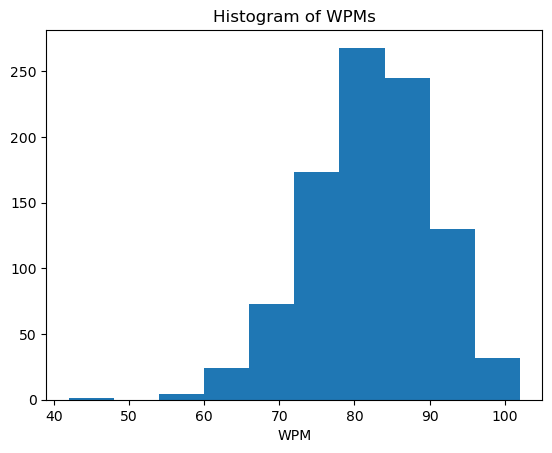

In [72]:
#Let's graph Average WPM:
plt.hist(kb_df['WPM'])
plt.title('Histogram of WPMs')
plt.xlabel('WPM')

#### Through our graph, we can see slight skewedness in our data, as many of our tests seem to lean from 80-90s. That being said, thanks to our large sample size(CLT) and roughly normal looking plot, we can pass the normality clause. 

### **With all conditions passed, we can now conduct a confidence with the following variable.**

### <span style=color:green> Making the Confidence Interval: </span>

In [73]:
int_data = kb_df['WPM']
stats.t.interval(confidence = 0.95, df = len(int_data)-1, loc = np.mean(int_data), scale=stats.sem(int_data))

(np.float64(81.02216437454538), np.float64(82.05994088861252))

### **Conclusion:** We are 95% confident that the confidence interval (81.022, 82.06) would contain the mean Words Per Minute when performing a MonkeyType test. 

## <span style=color:blue> **Question 6:** Construct a 95% Confidence Interval for Adjusted Mean WPM. </span>

### **1. Random Sample**

#### We pass the Random Sample clause for the same reason we did earlier (Constructing CI For WPM)

### **2. Independence**

#### We pass the Independence clause for the same reason we did earlier

### **3. Normality**

Text(0.5, 0, 'WPM')

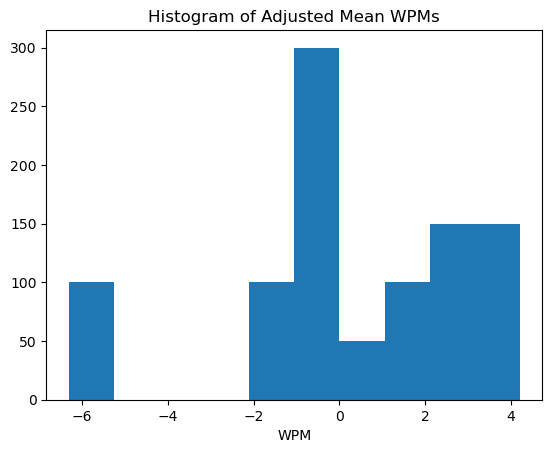

In [74]:
plt.hist(kb_df['Adj. Mean WPM'])
plt.title('Histogram of Adjusted Mean WPMs')
plt.xlabel('WPM')

#### **Unfortunately, because our data is not Normal, we cannot accurately create an Adjusted Mean Confidence Interval. However, let's create one anyway as a hypothetical.**

### <span style=color:green> Making the Confidence Interval: </span>

In [75]:
int_data = kb_df['Adj. Mean WPM']
stats.t.interval(confidence = 0.95, df = len(int_data)-1, loc = np.mean(int_data), scale=stats.sem(int_data))

(np.float64(0.29208597010908677), np.float64(0.655282450943545))

### **Conclusion:** We would be 95% confident that the confidence interval (0.29, 0.66) would contain the mean adjusted Words Per Minute(daily switch mean - daily benchmark mean), given that our data was normally distributed.

## <span style=color:blue>**Question 7:** Is there a relationship between dates and Average WPM/Accuracy? </span>

## <span style=color:green> Checking conditions to conduct Linear Regression: </span>

### 1. **Linearity**

#### WPM Model

Text(0.5, 1.0, 'Residual Plot')

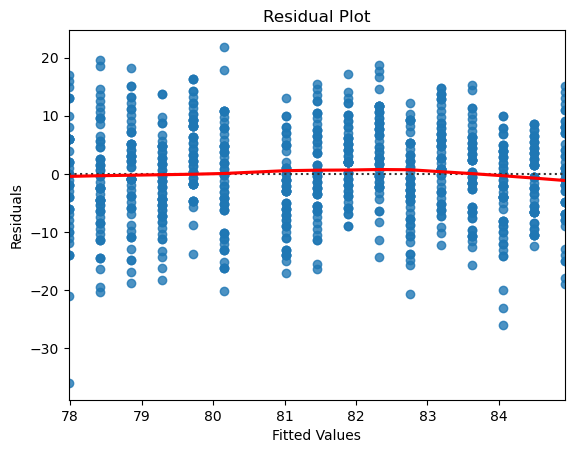

In [76]:
#Defining Variables
x = kb_df['days_since_start']
y1 = kb_df['WPM']
y2 = kb_df['Accuracy']

con_x = sm.add_constant(x) 
WPM_model = sm.OLS(y1, con_x).fit() 
predictions = WPM_model.predict(con_x)
residuals = y1 - predictions

sns.residplot(x=predictions, y=residuals, lowess=True, line_kws={"color": "red"})
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

#### Accuracy Model

Text(0.5, 1.0, 'Residual Plot')

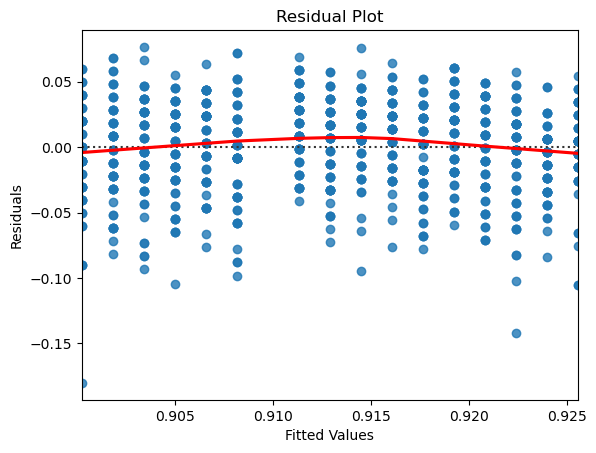

In [77]:
acc_model = sm.OLS(y2, con_x).fit() 
predictions = acc_model.predict(con_x)
residuals = y2 - predictions

sns.residplot(x=predictions, y=residuals, lowess=True, line_kws={"color": "red"})
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

#### There seems to be somewhat of a pattern in both of our predictors; however, I would argue the deviations from the plot are not severe enough to reject the linearity clause.

### **2. Independence:**

#### We passed this earlier when exploring a 95% confidence interval.

### **3. Homoscedasticity:**

#### Recalling both of the residual plots, there does not seem to be any clear trends present in either. For this reason, we can assume constant variance.

### **4. Normality:**

#### Recall: We passed the Normality Clause for WPM earlier when constructing the Confidence interval. We only need to plot the Accuracy Model:

(array([  1.,   0.,   2.,  14.,  44., 133., 168., 308., 237.,  43.]),
 array([0.72 , 0.747, 0.774, 0.801, 0.828, 0.855, 0.882, 0.909, 0.936,
        0.963, 0.99 ]),
 <BarContainer object of 10 artists>)

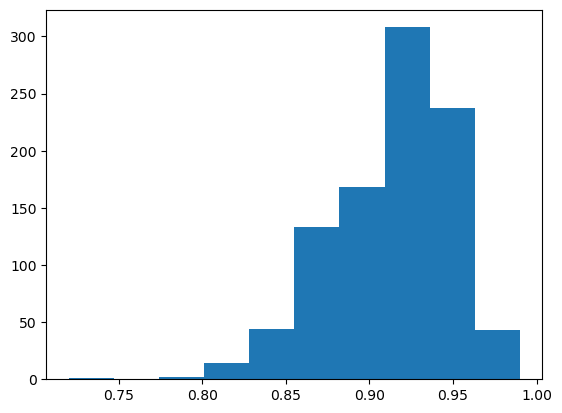

In [78]:
#Checking for Accuracy: 
plt.hist(kb_df['Accuracy'])

#### The data show slight left skewness. However, because of the large sample size, the effect of skewness is minimized by the Central Limit Theorem. We pass the Normality clause.

### **5. Outliers:**

#### <span style=color:green> Using Cook's Distance </span>

#### **WPM Plot:**

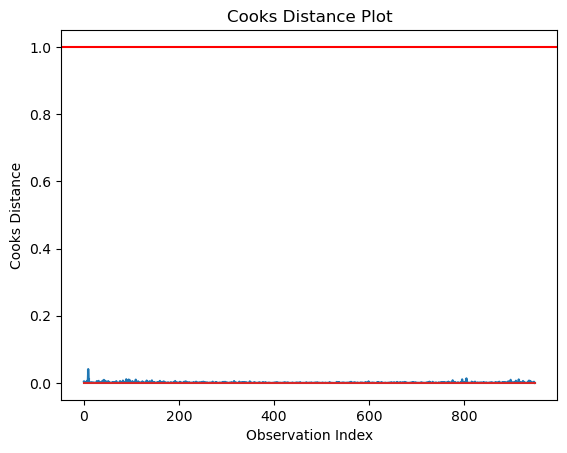

In [79]:
wpm_influence = WPM_model.get_influence()

(wpm_cook_dist, wpm_p_vals) = wpm_influence.cooks_distance 

plt.stem(wpm_cook_dist,markerfmt= '-')
plt.xlabel('Observation Index')
plt.ylabel('Cooks Distance')
plt.title('Cooks Distance Plot')
plt.axhline(1, color = 'red', linestyle= '-')

#### **Accuracy Plot:**

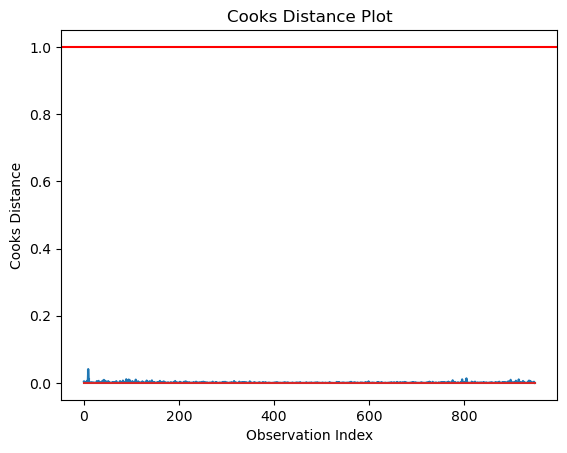

In [80]:
acc_influence = WPM_model.get_influence()

(acc_cook_dist, acc_p_vals) = acc_influence.cooks_distance 

plt.stem(acc_cook_dist,markerfmt= '-')
plt.xlabel('Observation Index')
plt.ylabel('Cooks Distance')
plt.title('Cooks Distance Plot')
plt.axhline(1, color = 'red', linestyle= '-')

#### **Observation:** We see that both plots offer about the same Cook's Distance results, showing a slight outlier at around ~40th index. However, because the point in both plots has a tiny distance(approx 0.05), we can assume it's not highly influential.

### **With all conditions passed, we can now conduct linear regression with the following variables.**

#### <span style=color:green> WPM Model: </span>

In [81]:
WPM_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    WPM   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     71.79
Date:                Fri, 22 Aug 2025   Prob (F-statistic):           9.05e-17
Time:                        12:35:12   Log-Likelihood:                -3305.9
No. Observations:                 950   AIC:                             6616.
Df Residuals:                     948   BIC:                             6625.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               77.9778      0.492    158.540      0.000      77.013      78.943
days_since_start     0.4340      0.051      8.473      0.000       0.333       0.535
==============================================================================
Omnibus:                        8.076   Durbin-Watson:                   1.753
Prob(Omnibus):                  0.018   Jarque-Bera (JB):                7.992
Skew:                          -0.214   Prob(JB):                       0.0184
Kurtosis:                       3.136   Cond. No.                         18.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### <span style=color:green> Accuracy Model: </span>

In [82]:
acc_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Accuracy   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     49.05
Date:                Fri, 22 Aug 2025   Prob (F-statistic):           4.72e-12
Time:                        12:35:12   Log-Likelihood:                 1846.7
No. Observations:                 950   AIC:                            -3689.
Df Residuals:                     948   BIC:                            -3680.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.9003      0.002    415.013      0.000       0.896       0.905
days_since_start     0.0016      0.000      7.004      0.000       0.001       0.002
==============================================================================
Omnibus:                       67.135   Durbin-Watson:                   1.793
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.446
Skew:                          -0.634   Prob(JB):                     7.58e-19
Kurtosis:                       3.706   Cond. No.                         18.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### <span style=color:green>Finding r: </span>

In [83]:
WPM_r = 0.070**0.5
ACC_r = 0.049**0.5

print(f'WPM model r = {WPM_r}')
print(f'ACC model r = {ACC_r}')


WPM model r = 0.2645751311064591
ACC model r = 0.22135943621178655


### **Conclusion:** 
#### 1) Every day, I am expected to increase my average WPM by 0.43 and accuracy by 0.0016
#### 2) There is a weak linear relationship between both WPM(0.26) and accuracy(0.22).

## <span style=color:blue> **Question 8:** Can we predict the WPM of a switch based on it's ID? <span>

## <span style=color:green> Checking conditions to conduct ANOVA regression: </span>

### **1.Independence**

#### Knowing the results of one switch will not tell us anything about one of a different ID. The design of the experiment was also made to ensure typing tests of various IDs did not interfere with one another. 

### **2. Homoscedasticity**

Text(0.5, 1.0, 'Residual Plot')

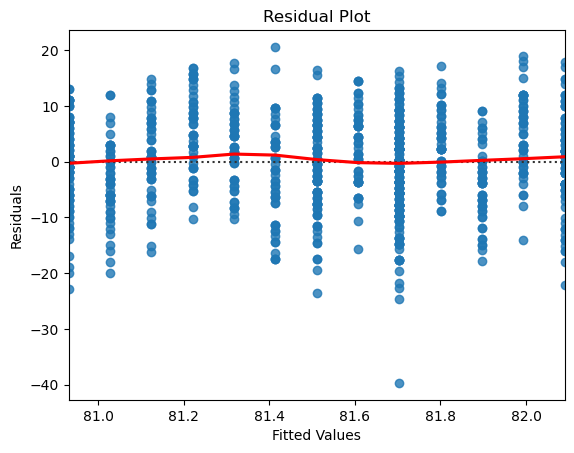

In [84]:
x = kb_df['ID']
y = kb_df['WPM']

con_x = sm.add_constant(x) 
ID_model = sm.OLS(y, con_x).fit() 
predictions = ID_model.predict(con_x)
residuals = y - predictions

sns.residplot(x=predictions, y=residuals, lowess=True, line_kws={"color": "red"})
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

#### We notice no clear pattern in our residual plots; random scatter is present in the model. 

### **3. Normality**

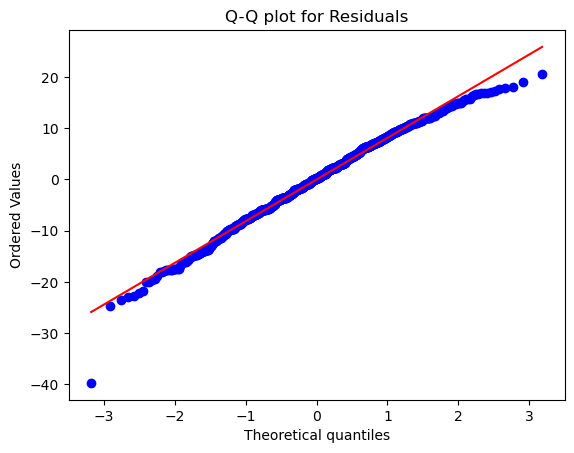

In [85]:
#Making a QQ-Plot:
stats.probplot(residuals, dist = 'norm', plot = plt)
plt.title("Q-Q plot for Residuals")
plt.show()

#### We see our data following roughly the same linear pattern as displayed on our reference line. We can assume our data is roughly linear.

### **With all conditions passed, we can now conduct ANOVA Regression with the following variables.**

## <span style=color:green> Conducting an ANOVA test: </span>

In [86]:
from statsmodels.formula.api import ols

ID_model = ols('WPM ~ C(ID)', data=kb_df).fit()
anova_table = sm.stats.anova_lm(ID_model, typ=2)

print(anova_table)

                sum_sq     df        F        PR(>F)
C(ID)      6505.943947   12.0  8.98776  1.702210e-16
Residual  56521.955000  937.0      NaN           NaN


### Observations: 
#### We see that our F-statistic of 8.99 and p-value of close to 0 shows that ID is a significant predictor in determining a test's WPM. 

## <span style=color:green> Predicting the WPM of  each ID: </span>

In [87]:
# Predicted mean WPM per switch
pred_table = kb_df[['ID']].drop_duplicates()
pred_table['Predicted_WPM'] = ID_model.predict(pred_table)
pred_table.tail()
pred_table.sort_values(by = 'ID')

,ID,Predicted_WPM
110,1,81.970
530,2,86.780
350,3,77.820
470,4,84.760
0,5,79.685
230,6,84.180
50,7,81.110
290,8,79.460
710,9,83.920
650,10,86.680


In [88]:
#Sorting by WPM: 
pred_table.sort_values(by = 'Predicted_WPM')

,ID,Predicted_WPM
170,12,77.300
350,3,77.820
290,8,79.460
0,5,79.685
590,13,80.560
50,7,81.110
110,1,81.970
410,11,82.360
710,9,83.920
230,6,84.180


### **Legend:**
#### ID: 1) Curry, 2) Xinhai, 3) Higanbana, 4) Type R, 5) Oil King, 6) Kiwi, 7) Holy Pandas, 8) Tealios V2, 9) Sonja, 10) Melodic,  11) Brown, 12) Banana Milk, 13) Tangerine. 

### **Observations:**
#### 1) Of the switches I tested, it seems that we are likely to perform the best with the Xinhais, but worst with the Banana Milks. 
#### 2) We also see a range of about 10 WPM between the best/worst performing switches. 

## <span style=color:blue> **Question 9:** Can we predict the WPM of a switch based on Loudness, Enjoyment, Weight, Sound, and Tactility? <span>

## <span style=color:green> Checking conditions to conduct Linear Regression: </span>

### **1. Linearity**

In [89]:
#Checking numeric predictors only
x = kb_df[['Loudness', 'Weight', 'Price']]
x1 = kb_df['Loudness']
x2 = kb_df['Weight']
x3 = kb_df['Price']
y = kb_df['WPM']

### Checking for Loudness:

Text(0.5, 1.0, 'Residual Plot')

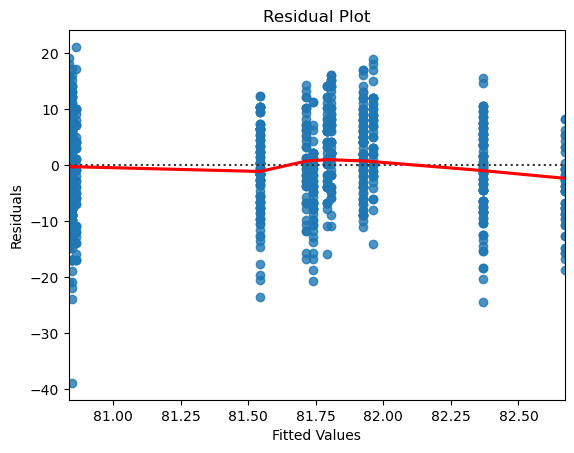

In [90]:
con_x = sm.add_constant(x1) 
x1_model = sm.OLS(y, con_x).fit() 
predictions = x1_model.predict(con_x)
residuals = y - predictions

sns.residplot(x=predictions, y=residuals, lowess=True, line_kws={"color": "red"})
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

### Checking for Weight:

Text(0.5, 1.0, 'Residual Plot')

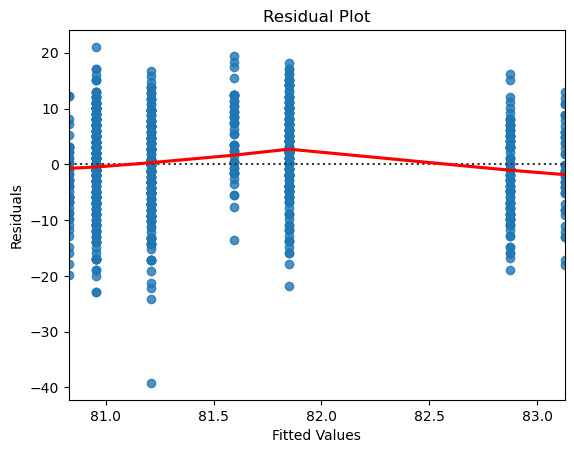

In [91]:
con_x = sm.add_constant(x2) 
x2_model = sm.OLS(y, con_x).fit() 
predictions = x2_model.predict(con_x)
residuals = y - predictions

sns.residplot(x=predictions, y=residuals, lowess=True, line_kws={"color": "red"})
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

### Checking for Price:

Text(0.5, 1.0, 'Residual Plot')

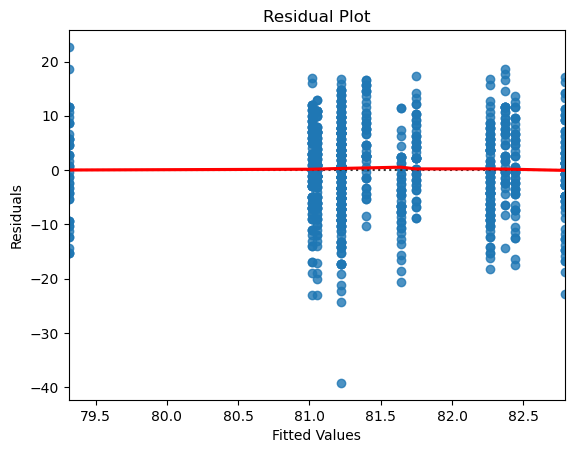

In [92]:
con_x = sm.add_constant(x3) 
x3_model = sm.OLS(y, con_x).fit() 
predictions = x3_model.predict(con_x)
residuals = y - predictions

sns.residplot(x=predictions, y=residuals, lowess=True, line_kws={"color": "red"})
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

### Checking for All:

Text(0.5, 1.0, 'Residual Plot')

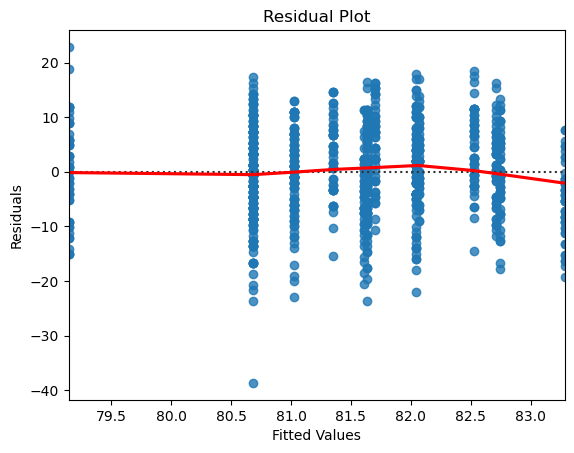

In [93]:
con_x = sm.add_constant(x) 
full_model = sm.OLS(y, con_x).fit() 
predictions = full_model.predict(con_x)
residuals = y - predictions

sns.residplot(x=predictions, y=residuals, lowess=True, line_kws={"color": "red"})
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

#### There seems to be a slight curvature in our residual plot, indicating that our data is likely not fully linear. However, I would argue the curvature is not severe enough to fail the linear clause, passing the condition.

### **2.Independence**

#### We pass Independence due to the design of our experiment.

### **3. Homoscedasticity**

#### We notice no clear pattern in our variables when observing all residual plots, therefore we can pass constant variance for all numeric predictors.

#### Checking for our categorical variables: 

(array([650.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 300.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

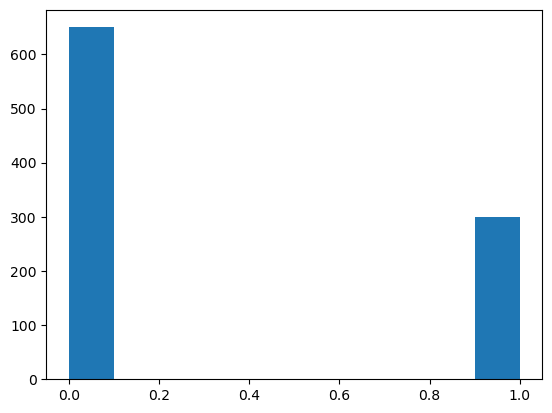

In [94]:
plt.hist(kb_df['Tactility'])

#### We can see that there are about twice as the linear tests in comparison to tactile. However, we due note that the sample sizes for both are rather large, with 300 for tactile, and 650 for linear. In this case, because the sizes are not drastically different, let's cautiously pass the homoscedasticity clause.

### **4. Normality**

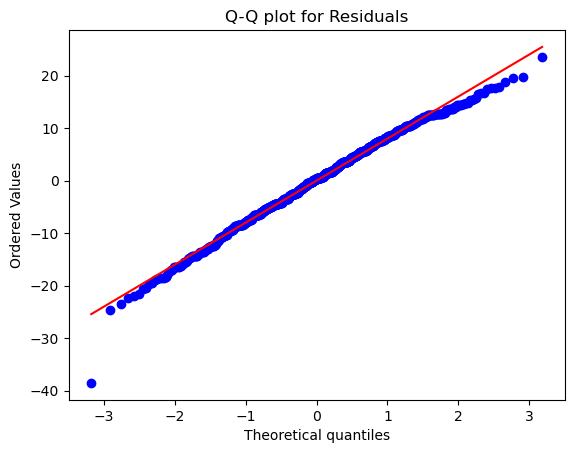

In [95]:
#Creating a QQ-Plot for Normality: 
x = kb_df[['Loudness', 'Weight', 'Price', 'Tactility']]
y = kb_df['WPM']

con_x = sm.add_constant(x)
full_model = sm.OLS(y, con_x).fit()
predictions =  full_model.predict(con_x)
residuals = y - predictions

stats.probplot(residuals, dist = 'norm', plot = plt)
plt.title("Q-Q plot for Residuals")
plt.show()

#### Judging by our Q-Q plot, we can see that our predictor's residuals are roughly normally distributed across the reference linear line. We pass the normality condition. 

### **5. Outliers**

#### There seems to be at most one "influencial outlier". Let's quicky check using Cook's Distance. 

Text(0, 0.5, "Cook's Distance")

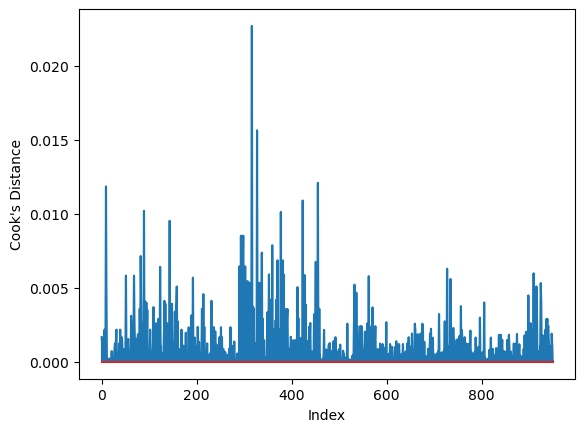

In [96]:
#Cook's Distance:
full_influence = full_model.get_influence()

(full_cook_dist, full_p_vals) = full_influence.cooks_distance

plt.stem(full_cook_dist,markerfmt = '-')
plt.xlabel("Index")
plt.ylabel("Cook's Distance")

#### Judging by our graph, we can see that there are 2 indices that stick out, one acheiving a distance of ~0.025, and the other ~0.15. In the context of Cook's Distance, values below 0.2 are likely not influenctial to a model. Therefore, the following two points will not affect our models by much, and therefore we pass the outlier clause. 

### **6. Collinearity**

In [97]:
#Using VIF: 
vif_data = pd.DataFrame()
vif_data['feature'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

print(vif_data)

     feature         VIF
0   Loudness  100.322256
1     Weight  134.471967
2      Price   11.893354
3  Tactility    1.807122


#### We see that 3 of our predictors have particularly high VIF. This is a problem if we were to draw conclusions and make inferences based on our data. However, because we are trying to make a predictive model, it's not a deal breaker.

### **With all conditions passed, we can now conduct multiple linear regression with the following variables.**

## <span style=color:green> Splitting and Training/Testing our data: </span>

In [98]:
#Splitting our data:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(x, y, test_size = 0.3, random_state = 123)

In [99]:
predict_model = LinearRegression()
#Fitting the model:
predict_model.fit(X_trainset, y_trainset)

#Make the predictions:
y_pred = predict_model.predict(X_testset)

#Performance Measurements: 
mse = mean_squared_error(y_testset, y_pred)
r2 = r2_score(y_testset, y_pred)

print(f'mse = {mse}')
print(f'r2 = {r2}')

mse = 61.01553676180331
r2 = 0.014121616359920153


### **Conclusion:**
#### 1) I achieve an MSE of 61.0155. If we were to estimate, that means on average, our model will likely be about ~8 WPM off. 
#### 2) An r2 of 0.014 tells us that the model does not account for much of the variability in WPM at all. 

## <span style=color:green> Estimating our WPM given values: </span>

In [100]:
#Making an entry: 
new_data = pd.DataFrame({
        'Loudness': [65],
        'Weight': [60], 
        'Price': [0.6],
        'Tactility': [1]
})   

predicted_value = predict_model.predict(new_data)

print(f'The predicted value of a typing test given a a loudness of 65DB, 60g weight, 60 cents a switch, and is a tactile switch is: {predicted_value}')

The predicted value of a typing test given a a loudness of 65DB, 60g weight, 60 cents a switch, and is a tactile switch is: [83.60921039]


#### What if we made an entry that does not contain values within the range we have sampled from?

In [101]:
newer_data = pd.DataFrame({
    'Loudness': [30],
    'Weight': [85],
    'Price': [1.5],
    'Tactility': [0]
})

new_predicted_value = predict_model.predict(newer_data)

print(f'The predicted value of a typing test given a a loudness of 30DB, 85g weight, $1.50 a switch, and is a linear switch is: {new_predicted_value}')

The predicted value of a typing test given a a loudness of 30DB, 85g weight, $1.50 a switch, and is a linear switch is: [79.45284819]


## <span style=color:blue> **Question 10:** Given all the predictors, can we predict the WPM of a test? <span>

## <span style=color:green> Checking for Overfitting: </span>

In [102]:
x = kb_df[['Accuracy', 'Loudness', 'Weight', 'Price', 'Tactility', 'Date Average', 'Date Accuracy', 'days_since_start' ]]
y = kb_df['WPM']

x_trainset, x_testset, y_trainset, y_testset = train_test_split(x, y, test_size = 0.3, random_state = 123)

#Fitting the Random Forest: 
rf = RandomForestRegressor(random_state = 123)
rf.fit(x_trainset, y_trainset)

y_train_pred = rf.predict(x_trainset)
y_test_pred = rf.predict(x_testset)

train_r2 = r2_score(y_trainset, y_train_pred)
test_r2 = r2_score(y_testset, y_test_pred)

print(f'train r2: {train_r2}')
print(f'test r2: {test_r2}')

train r2: 0.8316037294600211
test r2: 0.5934838671331985


### **Conclusion**:
#### It seems that our data is capturing some noise: our training set explains about 83% of the variance in new unseen data, while the test set only captures about 59%. Nevertheless, we can capture a good amount of unseen data with the following.

## <span style=color:green> Running Random Foresting: </span>

In [103]:
#Predicting using somewhat average numbers:
rf = RandomForestRegressor(n_estimators = 75, random_state = 123)
rf.fit(x_trainset, y_trainset)
rf_data = pd.DataFrame([['92', '60', '65', '0.65', '0', '82', '91', '7']], columns=x_trainset.columns)

rf_prediction = rf.predict(rf_data)
print('Predicted WPM:', rf_prediction[0])

Predicted WPM: 94.23155555555556


In [104]:
#Low Numbers: 
rf_data = pd.DataFrame([['82', '50', '40', '0.25', '0', '70', '81', '1']], columns=x_trainset.columns)

rf_low_prediction = rf.predict(rf_data)
print('Predicted WPM', rf_low_prediction[0])

Predicted WPM 91.94766666666668


# <span style=color:blue> **Part 6:** Conclusions <span>

## <span style=color:blue>**Part 4:** Exploratory Data Analysis </span>

### <span style=color:green> **Question 1:** What do the following summary statistics of each predictor tell us? </span>
#### **WPM:** If I took the average of all my typing tests, I would type at an average of 81.5 WPM. This is fairly accurate to what my overall WPM is in Monkeytype (81 WPM). The distribution also seems to be normal, outside of 2 outliers.
#### **Accuracy**: If I took the average of all my typing tests, I would have a typing accuracy of 91.3%. Like WPM, we are normally distributed, outside of the 4 outliers present. There are likely more outliers for accuracy than WPM because we had a tighter spread for accuracy than WPM, meaning there is less variability. 
#### **Loudness:** Of the 13 switches we tested, the average loudness (measured in dB) was about 68 DB. All things considered, this is fairly loud. However, this is likely due to the method I record the sound of the switches. We also have a skewed left distribution, telling me that we have switches that hover around 68+ more than <68.
#### **Price**: The average cost of one switch in the experiment is about 56 cents, which is fairly expensive in today's market. However, this is likely due to the majority of our switches being "older".
#### **Weight:** The average weight of all of the switches I tried was about 62.4 grams. I believe this is about average to above-average weight for switches today.
#### **Date Average:** When taking the average of all 16 testing days, my mean Daily WPM is 81.6. This is very close to our Average WPM. 
#### **Date Accuracy:** My mean Daily accuracy is 91.5%, which is slightly higher than my Average Accuracy. 

#### 1) We can see some outliers present in the WPM and Accuracy box plots, telling us that there were some extreme cases while I was typing. 
#### 2) Predictors may be skewed thanks to the inclusion of multiple runs of the Gateron Oil Kings, Tangerines, Holy Pandas, and Curry Switches.

### <span style=color:green>**Question 2:** What do the following summary statistics of each predictor tell us? </span>
#### 1) Most of our tests were between mid-70s to low-90s. 
#### 2) We see some outliers from the Tealios V2 (ID 8), and the Oil King, which has a very obvious outlier around ~40. The Tealios is an interesting case, as all of the other typing tests hovered around 65-90.
#### 3) The Oil king seems to have the widest variance among all of the switches, showing a large range of values ranging from ~40s to ~100. This is likely due to typing daily on them before every experiment.
    

## <span style=color:blue>**Part 5:** Data Analysis </span>

### <span style=color:green> **Question 3: Is there a correlation between Weight and WPM?**: <span> 
#### - **There is a very weak (almost non-existent) negative monotonic relationship between Weight and WPM($\rho$ = -0.12).**
#### - **Our small p-value (close to 0) indicates that there is a statistically significant monotonic relationship between Weight and WPM.**
#### While our relationship is unlikely to occur purely through chance(small p-value), the effect of the relationship is very weak ($\rho$). This likely means that other factors have a larger effect on WPM than Weight. 

### <span style=color:green> **Question 4: Is there a correlation between Price and WPM?**: </span>
#### - **There is a very weak (almost non-existent) negative monotonic relationship between Weight and WPM($\rho$ = -0.10).**
#### - **Our small p-value (close to 0) indicates that there is a statistically significant monotonic relationship between Weight and WPM.**
#### 1) While this relationship is unlikely to occur purely through chance, the effect of the relationship is very weak.
#### 2) Seeing that we achieve similar $\rho$ in both tests, I believe a reason for this is our repetition in data(for every one different price/weight category, there are 50 entries). This similarity in sample sizes/ranks leads to us having very little variety, resulting in our correlation being created through 13 categories.

### <span style=color:green> **Question 5: Construct a 95% Confidence Interval for WPM.** </span>
#### **We are 95% confident that the confidence interval (81.022, 82.06) would contain the mean Words Per Minute when performing a MonkeyType test.**
#### Our confidence interval has a range of about 1 word per minute. This is likely due to the high volume of data we had, creating a more precise and accurate range of our mean WPM.

### <span style=color:green> **Question 6: Construct a 95% Confidence Interval for Adjusted Mean WPM.**</span>
#### **We would be 95% confident that the confidence interval (0.29, 0.66) would contain the mean adjusted Words Per Minute(daily switch mean - daily benchmark mean), given that our data was normally distributed.**
#### 1) We are fairly confident of seeing a slight increase in our WPM in comparison to the benchmark switch. 
#### 2) The lack of categories and data is starting to show when we check for normality in all of these tests, because we don’t have enough variance in our data; we are left with clusters of data and spread-out distributions, rather than a cohesive histogram.


### <span style=color:green>**Question 7: Is there a relationship between dates and Average WPM/Accuracy?** </span>
#### - **Every day, I am expected to increase my average WPM by 0.43 and accuracy by 0.0016**
#### - **There is a weak linear relationship between both WPM(0.26) and accuracy(0.22).**

#### This is likely because I cannot continuously improve in typing accuracy and WPM every day, as many factors affect these statistics. It's also unreasonable to expect the same amount of growth day-to-day, as while I may improve drastically after a few days of continuously typing, eventually I am going to plateau in performance, only increasing in small increments. 

### <span style=color:green>**Question 8: Can we predict the WPM of a switch based on its ID?** 
#### - **We see that our F-statistic of 8.99 and p-value of close to 0 show that ID is a significant predictor in determining a test's WPM.**
#### - **Of the switches I tested, it seems that we are likely to perform the best with the Xinhais, but worst with the Banana Milks.**
#### - **We also see a range of about 10 WPM between the best/worst performing switches.**
#### 1) Given that each switch has many different factors (typing feel, weight, sound, bias, etc), it's no surprise that the switch itself would have a large impact on my WPM performance. 

#### 2) When looking at the order of the predicted performances, it seems that it's taking all of the data that we have accumulated and taking the average of each. This is slightly different from our summary table, as for switches I retested, I only took the average of the 50 new retests. The following table instead takes the average for all tests associated with a test, giving us an unbalanced result, where each switch is weighed differently. 

### <span style=color:green> **Question 9: Can we predict the WPM of a switch based on Loudness, Weight, Price, and Tactility?** <span>
#### - **I achieve an MSE of 61.0155. If we were to estimate, that means on average, our model will likely be about ~8 WPM off.**
#### - **An $r^2$ of 0.014 tells us that the model does not account for much of the variability in WPM at all.**
#### Because of our high MSE and low r2, we can only make rough estimates of what our data will be like with the following set of predictors


### <span style=color:green> **Question 10: Given all the predictors, can we predict the WPM of a test?** <span>
#### **It seems that our data is capturing some noise: our training set explains about 83% of the variance in new unseen data, while the test set only captures about 59%. Nevertheless, we can capture a good amount of unseen data with the following.**
#### 1) Our model is likely capturing noise and overfitting. When comparing our test and training r2, we see a fairly large difference between the two (0.24 difference). 
#### 2) The predictions are fairly large too, given that I selected predictors like Date WPM to be fairly low(70), yet we achieve a high WPM (92). While not impossible, these inaccuracies are likely due to the noise and imperfect model fit. 

# <span style=color:blue> **Part 7:** Future Improvements <span>

### <span style=color:green> **1st Improvement:** Sample Size: <span> 
#### While I was able to improve and achieve better results with the use of our current dataset, it's obvious that if we had a larger variety in data (more switches), we likely would have been able to achieve more precise and accurate analysis data.

### <span style=color:green> **2nd Improvement:** Sampling Methods: <span> 
#### I wish I had recorded more data when performing each typing test. For example, why not also record the Average DB of every typing test? This would have given us far more accurate sound measurements rather than using the average of 30 clicks of each switch. 